# Spectral Analyzer Results and Analysis

In this notebook we will look at comparing the results from the spectrum analyzer.

These data were collected for different lengths of exposed wire inside a plasma chamber.
Comparisons are made for each wire as well as with the case of no connection.
Apart for the first couple results, these were all mostly amplified signals (through an approx. 600-800 factor amplification)

The files were saved as .bmp files and converted to .csv using WebPlotDigitizer.

We will start with the plots with No Amplifier connected (which were all instantaneous clear write plots)

In [1]:
# Import necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from scipy.signal import find_peaks
import os
from copy import deepcopy

# First load and plot the data for the 'No Amp' case:
no_amp_files = [str(x)+'_csv_data.csv' for x in range(2,6)]

df_no_amp = []

for file in no_amp_files:
    df = pd.read_csv(file,header=None)
    df.columns = ['x','y']
    df_no_amp.append(df)


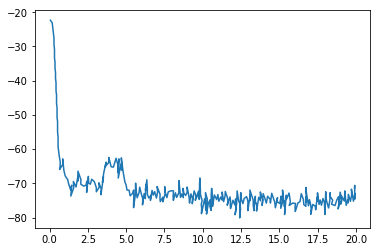

In [2]:
plt.plot(df_no_amp[0].x,df_no_amp[0].y)

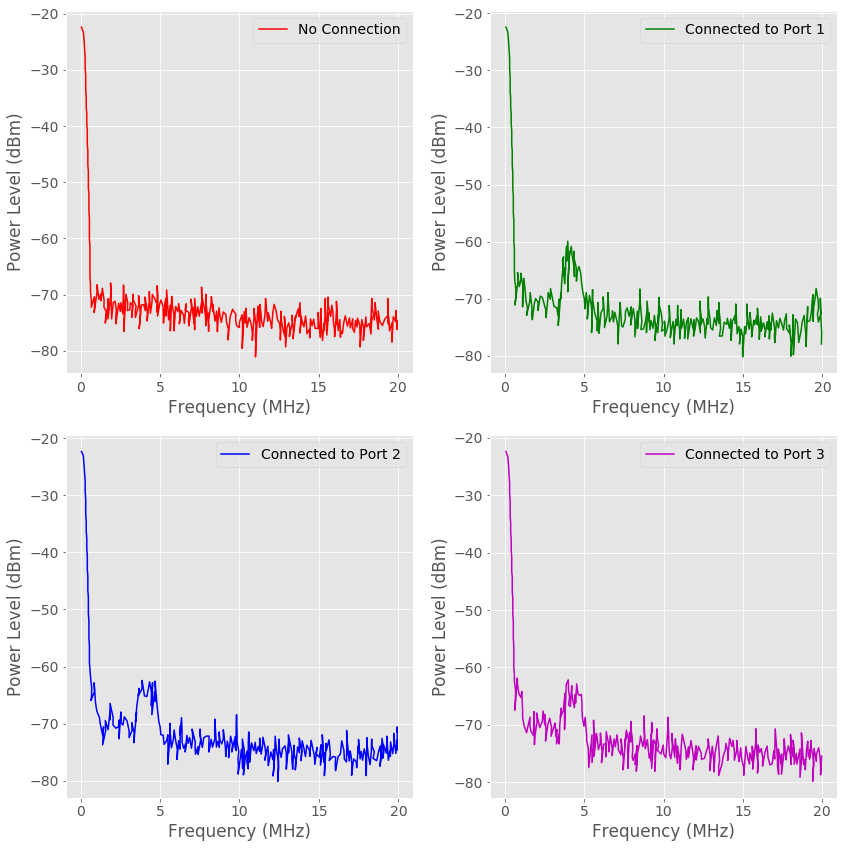

In [3]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
plt.style.use('ggplot')
plt.rc('font', **font)

def four_x_four_plot(UL,UR,LL,LR,x_label,y_label,fig_len,fig_h):
    fig = plt.figure(figsize=(fig_len,fig_h))
    ax1 = fig.add_subplot(221)
    ax1.plot(UL.x, UL.y, 'r')
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.legend(['No Connection'])

    ax2 = fig.add_subplot(222)
    ax2.plot(UR.x, UR.y, 'g')
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.legend(['Connected to Port 1'])

    ax3 = fig.add_subplot(223)
    ax3.plot(LL.x, LL.y, 'b')
    ax3.set_xlabel(x_label)
    ax3.set_ylabel(y_label)
    ax3.legend(['Connected to Port 2'])

    ax4 = fig.add_subplot(224)
    ax4.plot(LR.x, LR.y, 'm')
    ax4.set_xlabel(x_label)
    ax4.set_ylabel(y_label)
    ax4.legend(['Connected to Port 3'])
    plt.tight_layout()
    plt.show()
    return fig

F1 = four_x_four_plot(df_no_amp[3],df_no_amp[1],df_no_amp[0],df_no_amp[2],'Frequency (MHz)','Power Level (dBm)',12,12)
#F1.savefig('No_Amp_4x.eps')


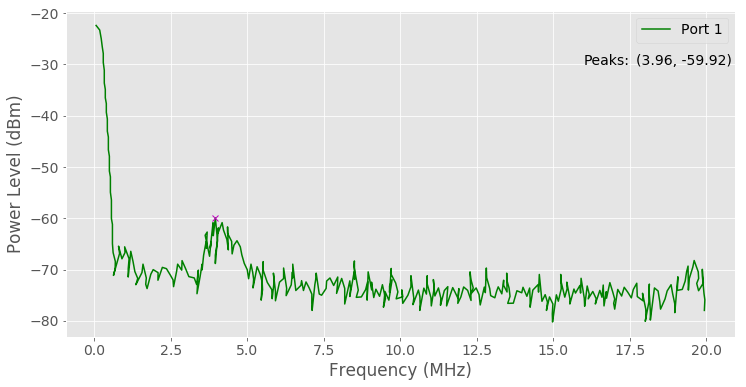

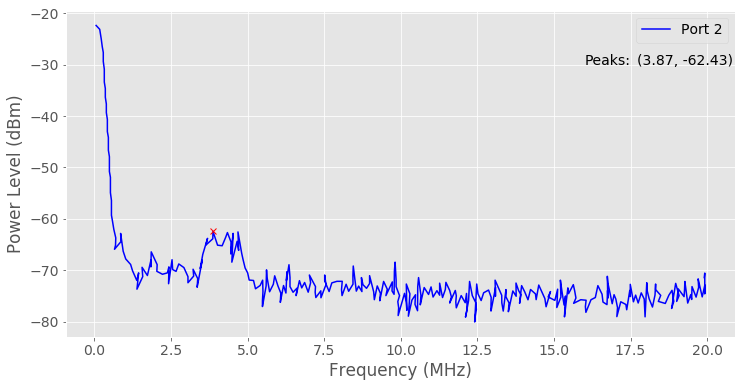

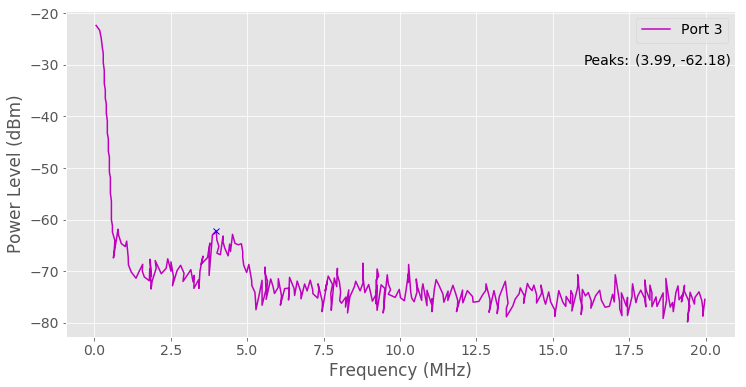

In [4]:
# Next we can find the peak values and plot them:

def peak_plot(df,peak_width,fig_len,fig_h,colr,mk_colr,pk_txt_x,x_gap,pk_txt_y,y_gap,plt_label,x_label,y_label):
    peaks, _= find_peaks(df.y,prominence=peak_width)
    fig = plt.figure(figsize=(fig_len,fig_h))
    ax = plt.gca()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.plot(df.x,df.y,colr)
    plt.plot(df.x[peaks], df.y[peaks], "x",color=mk_colr)
    plt.text(s='Peaks:',x=pk_txt_x,y=pk_txt_y)
    A = [round(x,2) for x in df.x[peaks].values]
    B = [round(y,2) for y in df.y[peaks].values]
    peak_tups = list(zip(A,B))
    for i in range(len(peak_tups)):
        plt.annotate('{}'.format(peak_tups[i]), 
                     xy=peak_tups[i], 
                     xytext = (pk_txt_x+x_gap,pk_txt_y-i*y_gap) , 
                     xycoords = 'data', 
                     textcoords='data')
    ax.legend([plt_label])
    plt.show()
    return fig
    
F2 = peak_plot(df_no_amp[1],10,12,6,"g",'m',16,1.7,-30,5,'Port 1','Frequency (MHz)','Power Level (dBm)')
F3 = peak_plot(df_no_amp[0],10,12,6,"b",'r',16,1.7,-30,5,'Port 2','Frequency (MHz)','Power Level (dBm)')
F4 = peak_plot(df_no_amp[2],10,12,6,"m",'b',16,1.7,-30,5,'Port 3','Frequency (MHz)','Power Level (dBm)')



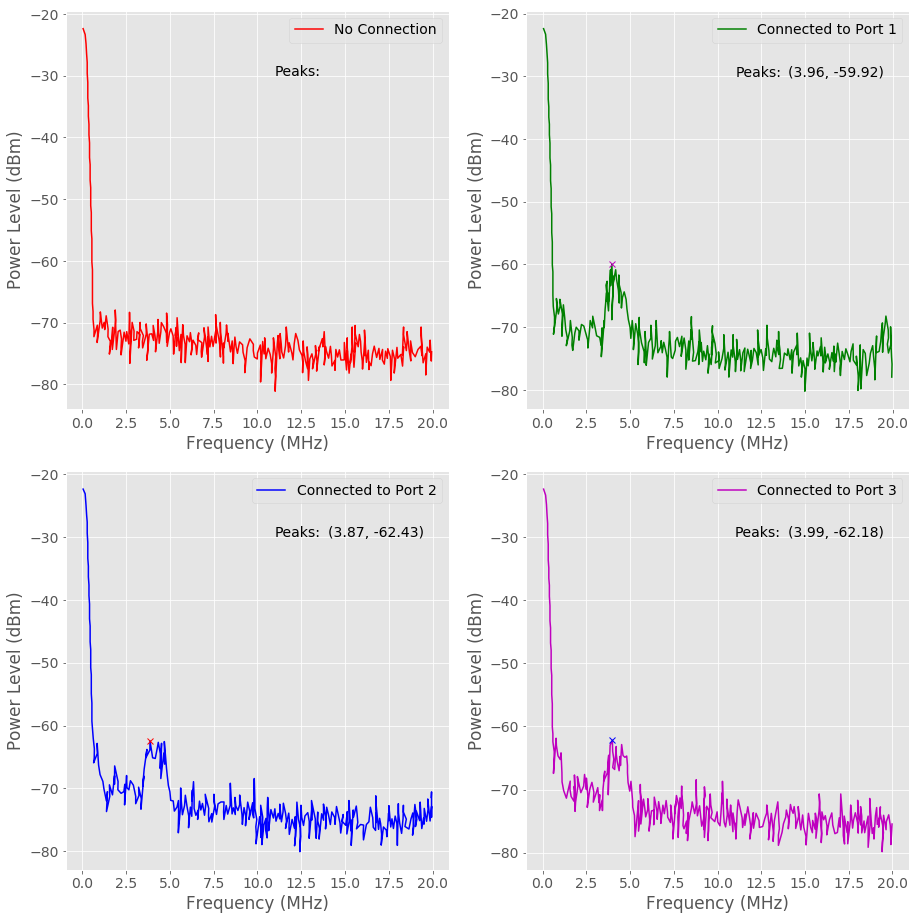

In [5]:
# We can also combine the two figures above to create a 4x4 plot that includes identification of peaks:

def ax_subplot(ax,df,peak_prom,colr,mk_colr,pk_txt_x,x_gap,pk_txt_y,y_gap,x_label,y_label):
    peaks, _= find_peaks(df.y,prominence=peak_prom)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(df.x,df.y,colr)
    ax.plot(df.x[peaks], df.y[peaks], "x",color=mk_colr)
    ax.text(s='Peaks:',x=pk_txt_x,y=pk_txt_y)
    A = [round(x,2) for x in df.x[peaks].values]
    B = [round(y,2) for y in df.y[peaks].values]
    peak_tups = list(zip(A,B))
    for i in range(len(peak_tups)):
        ax.annotate('{}'.format(peak_tups[i]), 
                    xy=peak_tups[i], 
                    xytext = (pk_txt_x+x_gap,pk_txt_y-i*y_gap), 
                    xycoords = 'data', 
                    textcoords='data')
    return ax
        
def peak_4x4_plot(UL,UR,LL,LR,peak_prom,fig_len,fig_h,pk_txt_x,x_gap,pk_txt_y,y_gap,x_label,y_label):
    
    fig = plt.figure(figsize=(fig_len,fig_h))
    
    ax1 = fig.add_subplot(221)
    ax1 = ax_subplot(ax1,UL,peak_prom,'r','b',pk_txt_x,x_gap,pk_txt_y,y_gap,x_label,y_label)
    ax1.legend(['No Connection'])

    ax2 = fig.add_subplot(222)
    ax2 = ax_subplot(ax2,UR,peak_prom,'g','m',pk_txt_x,x_gap,pk_txt_y,y_gap,x_label,y_label)
    ax2.legend(['Connected to Port 1'])

    ax3 = fig.add_subplot(223)
    ax3 = ax_subplot(ax3,LL,peak_prom,'b','r',pk_txt_x,x_gap,pk_txt_y,y_gap,x_label,y_label)
    ax3.legend(['Connected to Port 2'])

    ax4 = fig.add_subplot(224)
    ax4 = ax_subplot(ax4,LR,peak_prom,'m','b',pk_txt_x,x_gap,pk_txt_y,y_gap,x_label,y_label)
    ax4.legend(['Connected to Port 3'])
    plt.tight_layout()
    plt.show()
    
    return fig

No_Amp_Pk_4x4_fig = peak_4x4_plot(df_no_amp[3],df_no_amp[1],df_no_amp[0],df_no_amp[2],10,13,13,11,3,-30,5,'Frequency (MHz)','Power Level (dBm)')
No_Amp_Pk_4x4_fig.savefig('No_Amp_Peaks.eps')


In [6]:
#As Ports 1 and 3 represent the antennas of a dipole, we can subtract the two to create the dipole spectrum
#def dipole_calc(df1,df2):
#    df_new = deepcopy(df1)
#    df_new.y = df_new.y - df2.y
#    return df_new

In [7]:
#df_no_amp_di = dipole_calc(df_no_amp[1],df_no_amp[2])    
#F5 = peak_plot(df_no_amp_di,11,12,6,"#eb6703",'#3d4fd9',14.5,1.7,7.5,1,'Dipole (Port 1 - Port 3)','Frequency (MHz)','Average Power Level (dBm)')

Now we will look at Power Averaged spectra (average of 100 scans) after the amplifier has been attached for each port (for the span 0-20 MHz): 

In [8]:
# Create dataframes from files:

num_list = ['06','02','19','09']
amp_files = ['05062018'+x+'_csv_data.csv' for x in num_list]
df_amp = []

for file in amp_files:
    df = pd.read_csv(file,header=None)
    df.columns = ['x','y']
    df_amp.append(df)


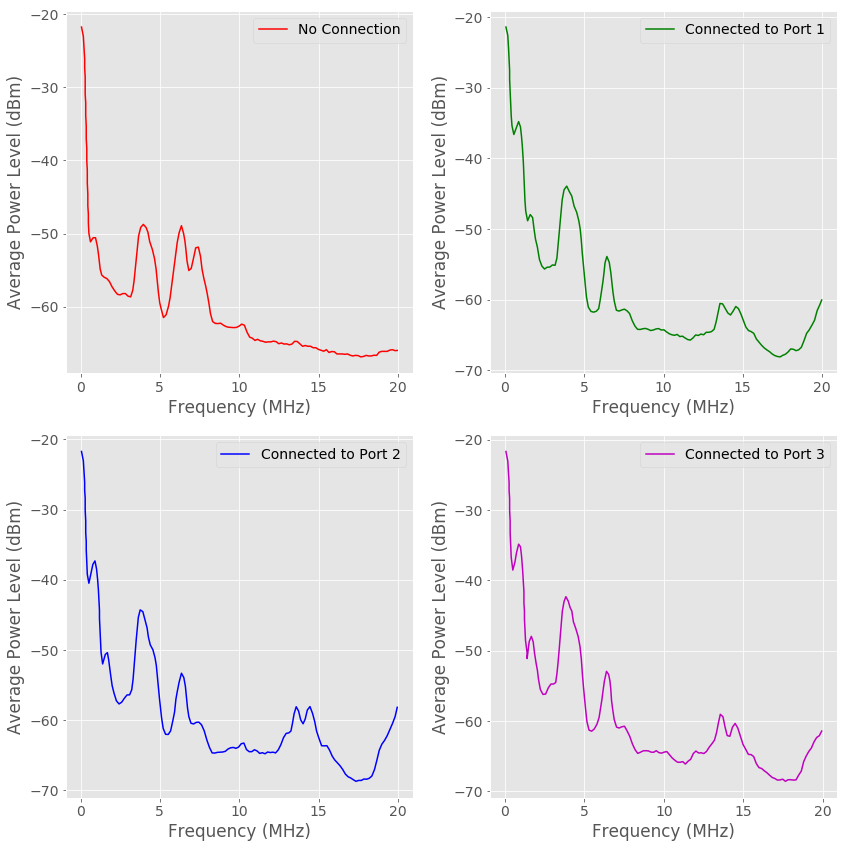

In [9]:
# Plot the 4x4 figure:
F6 = four_x_four_plot(df_amp[0],df_amp[1],df_amp[2],df_amp[3],'Frequency (MHz)','Average Power Level (dBm)',12,12)

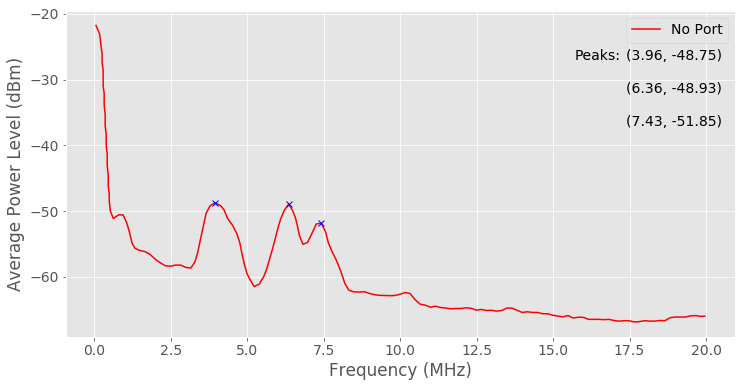

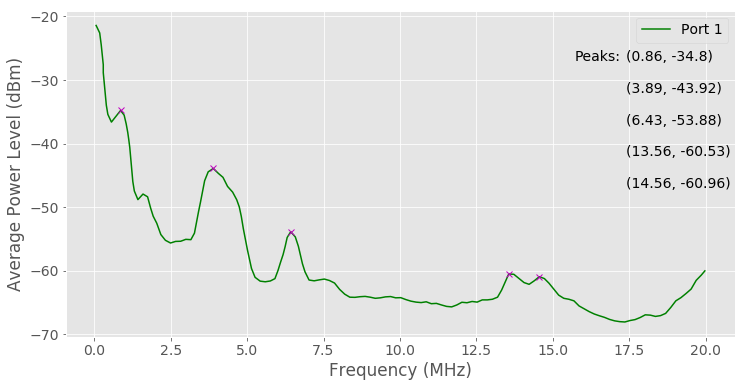

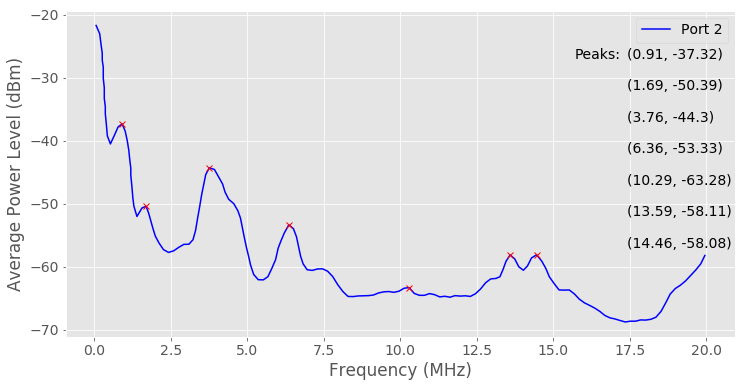

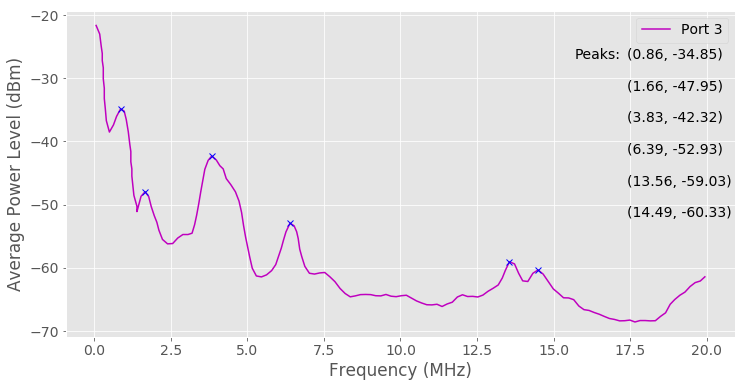

In [10]:
# Plot the peaks:
F7=peak_plot(df_amp[0],1,12,6,"r",'b',15.7,1.7,-27,5,'No Port','Frequency (MHz)','Average Power Level (dBm)')
F8=peak_plot(df_amp[1],1,12,6,"g",'m',15.7,1.7,-27,5,'Port 1','Frequency (MHz)','Average Power Level (dBm)')
F9=peak_plot(df_amp[2],1,12,6,"b",'r',15.7,1.7,-27,5,'Port 2','Frequency (MHz)','Average Power Level (dBm)')
F10=peak_plot(df_amp[3],1,12,6,"m",'b',15.7,1.7,-27,5,'Port 3','Frequency (MHz)','Average Power Level (dBm)')

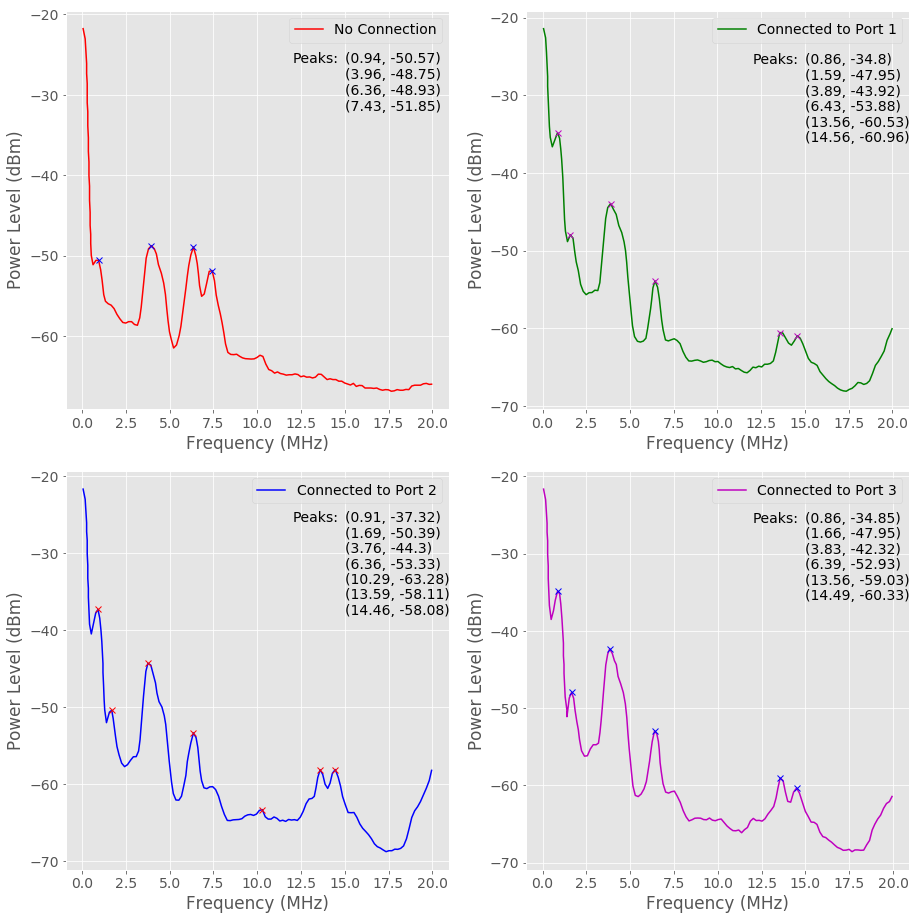

In [11]:
# Again we can plot the 4x4 peak plots, this time including the peaks:
Pwr_Spec_20MHz_4x4_fig = peak_4x4_plot(UL = df_amp[0], UR = df_amp[1], LL = df_amp[2], LR = df_amp[3],
                                       peak_prom = 0.5, fig_len = 13, fig_h = 13, pk_txt_x = 12, x_gap = 3,
                                       pk_txt_y = -26, y_gap = 2, x_label = 'Frequency (MHz)', y_label = 'Power Level (dBm)')
#Pwr_Spec_20MHz_4x4_fig.savefig('Pwr_Spec_Pk_20MHz.eps')


In [12]:
# Plot the dipole spectrum:
#df_amp_di = dipole_calc(df_amp[1],df_amp[3])    
#Pwr_Spec_Di_20MHz_fig = peak_plot(df_amp_di,1,12,6,"#eb6703",'#3d4fd9',9.7,2,-2,1,'Dipole (Port 1 - Port 3)','Frequency (MHz)','Average Power Level (dBm)')
#Pwr_Spec_Di_20MHz_fig.savefig('Pwr_Spec_Di_20MHz.eps')

In [13]:
# Try the other two port combination:
#df_amp_di_2 = dipole_calc(df_amp[2],df_amp[3])    
#F11=peak_plot(df_amp_di_2,0.5,12,6,"#eb6703",'#3d4fd9',16.2,1.6,-0.8,0.4,'Dipole (Port 2 - Port 3)','Frequency (MHz)','Average Power Level (dBm)')


Zooming in on the range 0-6 MHz we can re-create the above spectra. Below we will load the relevant files and then plot:

In [14]:
# Create dataframes from files:

num_list_zm = ['21','23','25','27']
amp_zm_files = ['05062018'+x+'_csv_data.csv' for x in num_list_zm]
df_amp_zm = []

for file in amp_zm_files:
    df = pd.read_csv(file,header=None)
    df.columns = ['x','y']
    df_amp_zm.append(df)

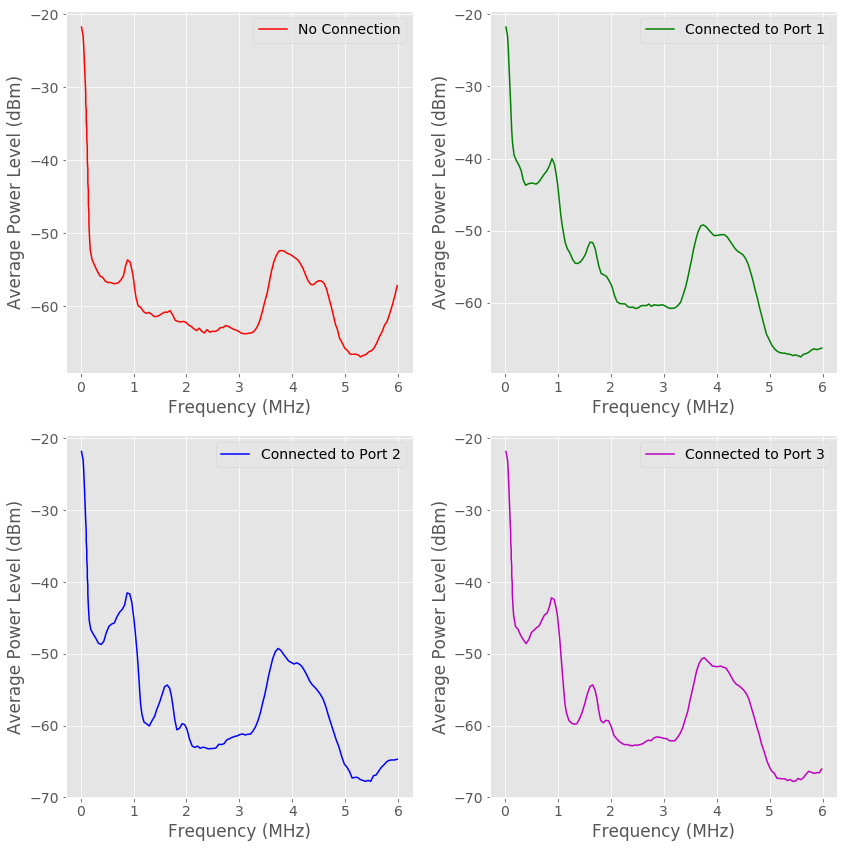

In [15]:
# Plot the 4x4 figure:
F12=four_x_four_plot(df_amp_zm[0],df_amp_zm[1],df_amp_zm[2],df_amp_zm[3],'Frequency (MHz)','Average Power Level (dBm)',12,12)

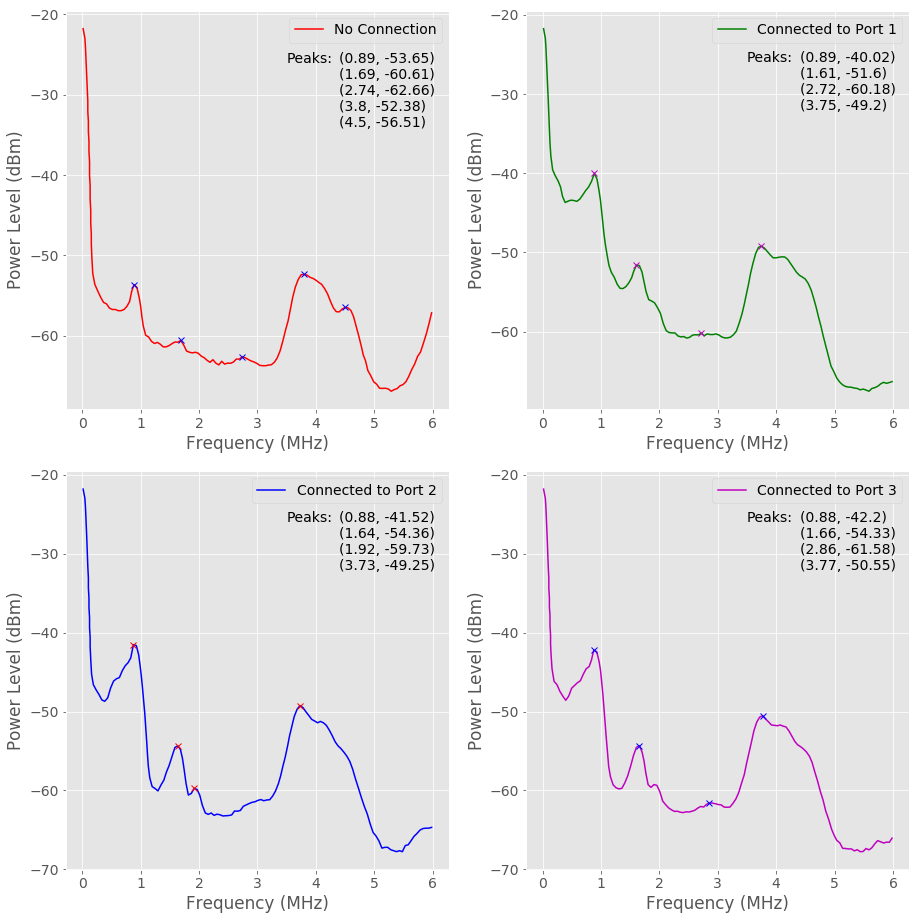

In [16]:
# Again we can plot the 4x4 peak plots:
Pwr_Spec_6MHz_4x4_fig = peak_4x4_plot(UL = df_amp_zm[0], UR = df_amp_zm[1], LL = df_amp_zm[2],LR = df_amp_zm[3],
                                      peak_prom = 0.5, fig_len = 13, fig_h = 13, pk_txt_x = 3.5, x_gap = 0.9,
                                      pk_txt_y = -26, y_gap = 2, x_label = 'Frequency (MHz)', y_label = 'Power Level (dBm)')
#Pwr_Spec_6MHz_4x4_fig.savefig('Pwr_Spec_Pk_6MHz.eps')

In [17]:
# Plot the dipole spectrum:
#df_amp_zm_di = dipole_calc(df_amp_zm[1],df_amp_zm[3])    
#Pwr_Spec_Di_6MHz_fig = peak_plot(df_amp_zm_di,1,12,6,"#eb6703",'#3d4fd9',4.8,0.5,6,0.9,'Dipole (Port 1 - Port 3)','Frequency (MHz)','Average Power Level (dBm)')
#Pwr_Spec_Di_6MHz_fig.savefig('Pwr_Spec_Di_6MHz.eps')

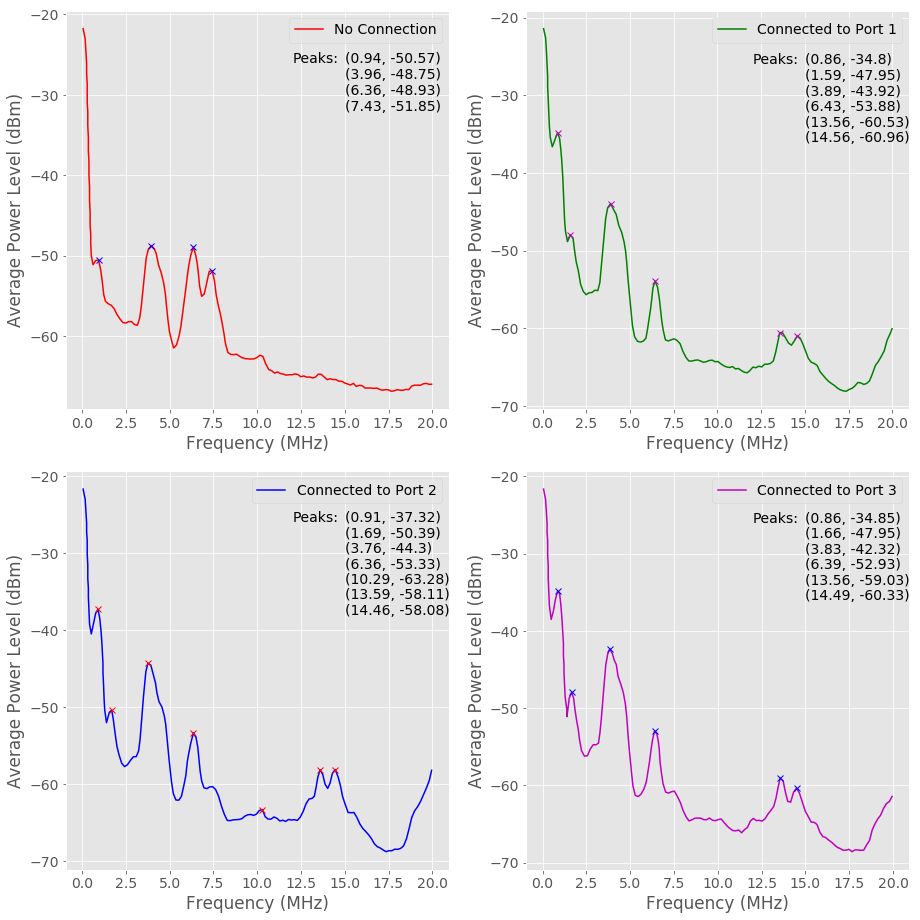

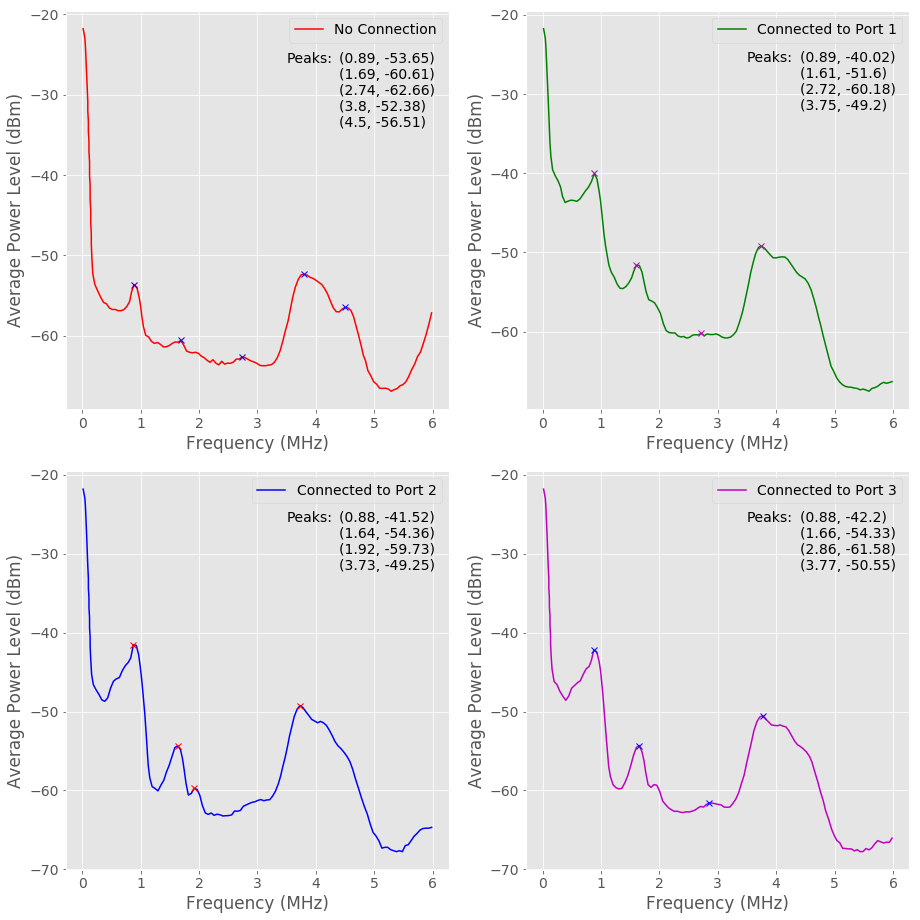

In [18]:
# Let's just plot the two 4x4 plots with peaks right after one another:
Pwr_Spec_20MHz_4x4_fig = peak_4x4_plot(UL = df_amp[0], UR = df_amp[1], LL = df_amp[2], LR = df_amp[3],
                                       peak_prom = 0.5, fig_len = 13, fig_h = 13, pk_txt_x = 12, x_gap = 3,
                                       pk_txt_y = -26, y_gap = 2, x_label = 'Frequency (MHz)', y_label = 'Average Power Level (dBm)')
#Pwr_Spec_20MHz_4x4_fig.savefig('Pwr_Spec_Pk_20MHz.eps')

Pwr_Spec_6MHz_4x4_fig = peak_4x4_plot(UL = df_amp_zm[0], UR = df_amp_zm[1], LL = df_amp_zm[2],LR = df_amp_zm[3],
                                      peak_prom = 0.5, fig_len = 13, fig_h = 13, pk_txt_x = 3.5, x_gap = 0.9, 
                                      pk_txt_y = -26, y_gap = 2, x_label = 'Frequency (MHz)', y_label = 'Average Power Level (dBm)')
#Pwr_Spec_6MHz_4x4_fig.savefig('Pwr_Spec_Pk_6MHz.eps')

One measurement of the 0 - 50 MHz range was also taken for Port 3, we will create the plot with peaks labelled below:

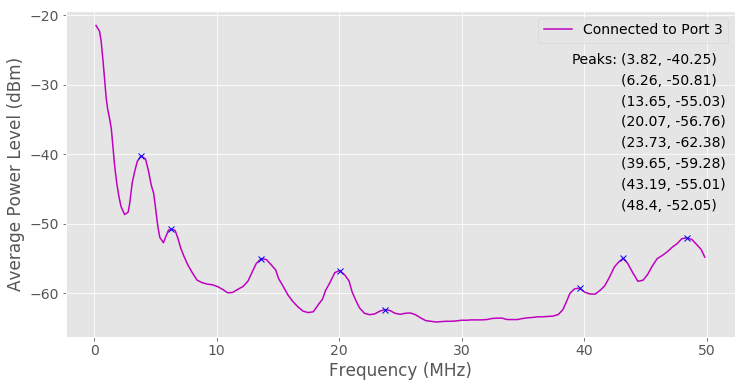

In [19]:
# Create dataframe from file:
df_amp_50 = pd.read_csv('0506201815_csv_data.csv',header=None)
df_amp_50.columns = ['x','y']

F50 = peak_plot(df_amp_50,0.5,12,6,"m",'b',39,4,-27,3,'Connected to Port 3','Frequency (MHz)','Average Power Level (dBm)')


Now that we have a series of peaks, we need to discover what is causing them and if there is any relationship between them. We will investigate the latter first below:

In [20]:
# To find the relationship between the peaks we can see if any of the peaks are harmonically related:

def peak_n_val(df,peak_prom):
    peaks_P1, _= find_peaks(df.y,prominence=peak_prom)
    #plt.plot(df.x[peaks_P1], df.y[peaks_P1], "^")
    A = [round(x,3) for x in df.x[peaks_P1].values]
    B = [round(y,3) for y in df.y[peaks_P1].values]
    peak_tups = list(zip(A,B))
    return (A, B, peak_tups)

def disp_peaks(df):
    #A = []
    #for i in range(0,num_df):
    #    B, _, _ = peak_n_val(df[i],0.5)
    #    A.append(B)
    #    B = None
    A_0, _, _ = peak_n_val(df[0],0.5)
    A_1, _, _ = peak_n_val(df[1],0.5)
    A_2, _, _ = peak_n_val(df[2],0.5)
    A_3, _, _ = peak_n_val(df[3],0.5)
    print('Peaks for each Port in MHz')
    print('No Connection: ', [round(x,2) for x in A_0])
    print('Port 1: ', [round(x,2) for x in A_1])
    print('Port 2: ', [round(x,2) for x in A_2])
    print('Port 3: ', [round(x,2) for x in A_3])
    
def print_pk_harm(df,num,disp_pks):
    A_1, _, _ = peak_n_val(df[1],0.5)
    A_2, _, _ = peak_n_val(df[2],0.5)
    A_3, _, _ = peak_n_val(df[3],0.5)
    if disp_pks == 1:
        disp_peaks(df)
    print('Dividing All Peaks by peak number:',num+1)
    print('Port 1: ',[round(x/A_1[num],2) for x in A_1])
    print('Port 2: ',[round(x/A_2[num],2) for x in A_2])
    print('Port 3: ',[round(x/A_3[num],2) for x in A_3])

def cycle_pks(df,num,disp_pks):
    for i in range(0,num):
        print_pk_harm(df,i,disp_pks)

print_pk_harm(df_amp,0,1)


Peaks for each Port in MHz
No Connection:  [0.94, 3.96, 6.36, 7.43]
Port 1:  [0.86, 1.59, 3.89, 6.43, 13.56, 14.56]
Port 2:  [0.91, 1.69, 3.76, 6.36, 10.29, 13.59, 14.46]
Port 3:  [0.86, 1.66, 3.84, 6.39, 13.56, 14.49]
Dividing All Peaks by peak number: 1
Port 1:  [1.0, 1.85, 4.53, 7.47, 15.77, 16.93]
Port 2:  [1.0, 1.86, 4.13, 6.99, 11.31, 14.94, 15.89]
Port 3:  [1.0, 1.93, 4.46, 7.43, 15.77, 16.85]


In [21]:
print_pk_harm(df_amp,1,1)

Peaks for each Port in MHz
No Connection:  [0.94, 3.96, 6.36, 7.43]
Port 1:  [0.86, 1.59, 3.89, 6.43, 13.56, 14.56]
Port 2:  [0.91, 1.69, 3.76, 6.36, 10.29, 13.59, 14.46]
Port 3:  [0.86, 1.66, 3.84, 6.39, 13.56, 14.49]
Dividing All Peaks by peak number: 2
Port 1:  [0.54, 1.0, 2.44, 4.03, 8.51, 9.14]
Port 2:  [0.54, 1.0, 2.22, 3.76, 6.08, 8.03, 8.54]
Port 3:  [0.52, 1.0, 2.31, 3.85, 8.17, 8.73]


In [22]:
print_pk_harm(df_amp,2,1)

Peaks for each Port in MHz
No Connection:  [0.94, 3.96, 6.36, 7.43]
Port 1:  [0.86, 1.59, 3.89, 6.43, 13.56, 14.56]
Port 2:  [0.91, 1.69, 3.76, 6.36, 10.29, 13.59, 14.46]
Port 3:  [0.86, 1.66, 3.84, 6.39, 13.56, 14.49]
Dividing All Peaks by peak number: 3
Port 1:  [0.22, 0.41, 1.0, 1.65, 3.48, 3.74]
Port 2:  [0.24, 0.45, 1.0, 1.69, 2.74, 3.61, 3.85]
Port 3:  [0.22, 0.43, 1.0, 1.67, 3.54, 3.78]


In [23]:
print_pk_harm(df_amp,3,1)

Peaks for each Port in MHz
No Connection:  [0.94, 3.96, 6.36, 7.43]
Port 1:  [0.86, 1.59, 3.89, 6.43, 13.56, 14.56]
Port 2:  [0.91, 1.69, 3.76, 6.36, 10.29, 13.59, 14.46]
Port 3:  [0.86, 1.66, 3.84, 6.39, 13.56, 14.49]
Dividing All Peaks by peak number: 4
Port 1:  [0.13, 0.25, 0.61, 1.0, 2.11, 2.27]
Port 2:  [0.14, 0.27, 0.59, 1.0, 1.62, 2.14, 2.27]
Port 3:  [0.13, 0.26, 0.6, 1.0, 2.12, 2.27]


In [24]:
print_pk_harm(df_amp,4,1)

Peaks for each Port in MHz
No Connection:  [0.94, 3.96, 6.36, 7.43]
Port 1:  [0.86, 1.59, 3.89, 6.43, 13.56, 14.56]
Port 2:  [0.91, 1.69, 3.76, 6.36, 10.29, 13.59, 14.46]
Port 3:  [0.86, 1.66, 3.84, 6.39, 13.56, 14.49]
Dividing All Peaks by peak number: 5
Port 1:  [0.06, 0.12, 0.29, 0.47, 1.0, 1.07]
Port 2:  [0.09, 0.16, 0.37, 0.62, 1.0, 1.32, 1.4]
Port 3:  [0.06, 0.12, 0.28, 0.47, 1.0, 1.07]


In [25]:
disp_peaks(df_amp)
cycle_pks(df_amp,5,0)

Peaks for each Port in MHz
No Connection:  [0.94, 3.96, 6.36, 7.43]
Port 1:  [0.86, 1.59, 3.89, 6.43, 13.56, 14.56]
Port 2:  [0.91, 1.69, 3.76, 6.36, 10.29, 13.59, 14.46]
Port 3:  [0.86, 1.66, 3.84, 6.39, 13.56, 14.49]
Dividing All Peaks by peak number: 1
Port 1:  [1.0, 1.85, 4.53, 7.47, 15.77, 16.93]
Port 2:  [1.0, 1.86, 4.13, 6.99, 11.31, 14.94, 15.89]
Port 3:  [1.0, 1.93, 4.46, 7.43, 15.77, 16.85]
Dividing All Peaks by peak number: 2
Port 1:  [0.54, 1.0, 2.44, 4.03, 8.51, 9.14]
Port 2:  [0.54, 1.0, 2.22, 3.76, 6.08, 8.03, 8.54]
Port 3:  [0.52, 1.0, 2.31, 3.85, 8.17, 8.73]
Dividing All Peaks by peak number: 3
Port 1:  [0.22, 0.41, 1.0, 1.65, 3.48, 3.74]
Port 2:  [0.24, 0.45, 1.0, 1.69, 2.74, 3.61, 3.85]
Port 3:  [0.22, 0.43, 1.0, 1.67, 3.54, 3.78]
Dividing All Peaks by peak number: 4
Port 1:  [0.13, 0.25, 0.61, 1.0, 2.11, 2.27]
Port 2:  [0.14, 0.27, 0.59, 1.0, 1.62, 2.14, 2.27]
Port 3:  [0.13, 0.26, 0.6, 1.0, 2.12, 2.27]
Dividing All Peaks by peak number: 5
Port 1:  [0.06, 0.12, 0.29

In [26]:
# Create a dataframe showing the relationship between each peak for each Port:

def peak_harm_df(df,peak_prom):
    peaks, _, _ = peak_n_val(df,peak_prom)
    data = []
    for peak in peaks:
        data.append([round(x/peak,2) for x in peaks])
    ind_label = [ 'Divided by '+str(round(peak,2))+' MHz' for peak in peaks]
    col_label = [ str(round(peak,2))+' MHz' for peak in peaks ]
    return pd.DataFrame(data=data, columns = col_label, index=ind_label)

df_harmonic_Port1 = peak_harm_df(df_amp[1],0.5)
df_harmonic_Port2 = peak_harm_df(df_amp[2],0.5)
df_harmonic_Port3 = peak_harm_df(df_amp[3],0.5)
df_harmonic_50 = peak_harm_df(df_amp_50,0.5)
#df_harmonic_Port3.to_latex('Harmonic_Port3.tex')

In [27]:
df_harmonic_Port1

,0.86 MHz,1.59 MHz,3.89 MHz,6.43 MHz,13.56 MHz,14.56 MHz
Divided by 0.86 MHz,1.00,1.85,4.53,7.47,15.77,16.93
Divided by 1.59 MHz,0.54,1.00,2.44,4.03,8.51,9.14
Divided by 3.89 MHz,0.22,0.41,1.00,1.65,3.48,3.74
Divided by 6.43 MHz,0.13,0.25,0.61,1.00,2.11,2.27
Divided by 13.56 MHz,0.06,0.12,0.29,0.47,1.00,1.07
Divided by 14.56 MHz,0.06,0.11,0.27,0.44,0.93,1.00


In [28]:
df_harmonic_Port2

,0.91 MHz,1.69 MHz,3.76 MHz,6.36 MHz,10.29 MHz,13.59 MHz,14.46 MHz
Divided by 0.91 MHz,1.00,1.86,4.13,6.99,11.31,14.94,15.89
Divided by 1.69 MHz,0.54,1.00,2.22,3.76,6.08,8.03,8.54
Divided by 3.76 MHz,0.24,0.45,1.00,1.69,2.74,3.61,3.85
Divided by 6.36 MHz,0.14,0.27,0.59,1.00,1.62,2.14,2.27
Divided by 10.29 MHz,0.09,0.16,0.37,0.62,1.00,1.32,1.40
Divided by 13.59 MHz,0.07,0.12,0.28,0.47,0.76,1.00,1.06
Divided by 14.46 MHz,0.06,0.12,0.26,0.44,0.71,0.94,1.00


In [29]:
df_harmonic_Port3

,0.86 MHz,1.66 MHz,3.84 MHz,6.39 MHz,13.56 MHz,14.49 MHz
Divided by 0.86 MHz,1.00,1.93,4.46,7.43,15.77,16.85
Divided by 1.66 MHz,0.52,1.00,2.31,3.85,8.17,8.73
Divided by 3.84 MHz,0.22,0.43,1.00,1.67,3.54,3.78
Divided by 6.39 MHz,0.13,0.26,0.60,1.00,2.12,2.27
Divided by 13.56 MHz,0.06,0.12,0.28,0.47,1.00,1.07
Divided by 14.49 MHz,0.06,0.11,0.26,0.44,0.94,1.00


In [30]:
df_harmonic_50

,3.82 MHz,6.26 MHz,13.65 MHz,20.07 MHz,23.73 MHz,39.65 MHz,43.19 MHz,48.4 MHz
Divided by 3.82 MHz,1.00,1.64,3.58,5.26,6.22,10.39,11.31,12.68
Divided by 6.26 MHz,0.61,1.00,2.18,3.20,3.79,6.33,6.90,7.73
Divided by 13.65 MHz,0.28,0.46,1.00,1.47,1.74,2.90,3.16,3.55
Divided by 20.07 MHz,0.19,0.31,0.68,1.00,1.18,1.98,2.15,2.41
Divided by 23.73 MHz,0.16,0.26,0.58,0.85,1.00,1.67,1.82,2.04
Divided by 39.65 MHz,0.10,0.16,0.34,0.51,0.60,1.00,1.09,1.22
Divided by 43.19 MHz,0.09,0.14,0.32,0.46,0.55,0.92,1.00,1.12
Divided by 48.4 MHz,0.08,0.13,0.28,0.41,0.49,0.82,0.89,1.00


It looks like peak 6 may be the second harmonic of peak 4. Peak 6 may also be the third harmonic of peak 3.

In [31]:
disp_peaks(df_amp_zm)
cycle_pks(df_amp_zm,4,0)

Peaks for each Port in MHz
No Connection:  [0.89, 1.69, 2.74, 3.8, 4.5]
Port 1:  [0.89, 1.61, 2.72, 3.75]
Port 2:  [0.88, 1.64, 1.92, 3.73]
Port 3:  [0.88, 1.66, 2.86, 3.77]
Dividing All Peaks by peak number: 1
Port 1:  [1.0, 1.81, 3.06, 4.22]
Port 2:  [1.0, 1.87, 2.18, 4.25]
Port 3:  [1.0, 1.89, 3.26, 4.29]
Dividing All Peaks by peak number: 2
Port 1:  [0.55, 1.0, 1.69, 2.33]
Port 2:  [0.54, 1.0, 1.17, 2.28]
Port 3:  [0.53, 1.0, 1.72, 2.27]
Dividing All Peaks by peak number: 3
Port 1:  [0.33, 0.59, 1.0, 1.38]
Port 2:  [0.46, 0.85, 1.0, 1.94]
Port 3:  [0.31, 0.58, 1.0, 1.32]
Dividing All Peaks by peak number: 4
Port 1:  [0.24, 0.43, 0.73, 1.0]
Port 2:  [0.24, 0.44, 0.51, 1.0]
Port 3:  [0.23, 0.44, 0.76, 1.0]


One explanation for the first two peaks is that what we are looking at is the electron gryfrequency (or electron cyclotron frequency) and half of that value. Although measurements were not taken on the, subsequency measurements of the background magnetic field inside the lab were taken on 21/09/2018. These measurements were taken using the internal magnetometer on a Google Pixel XL phone (The AKM's AK09915 magnetometer). The sensor collection rate was 49 Hz. The average magnetic field strength was 50.56 microtelsa.

Therefore the angular cyclotron frequency corresponds with:




In [32]:
# Electron mass:
me = 9.109383e-31 # kilogram
# Electron charge
e = 1.60217657e-19 # coulomb

def omega_ce(B):
    return (e*B)/me

def B_E(omega):
    return (me*omega)/e

gyro_w_50 = omega_ce(50.6e-6)

In [33]:
print('The gyrofrequency with mag field strength 50.6 uT is:',round(gyro_w_50/(2*np.pi*1e6),4),'MHz')

The gyrofrequency with mag field strength 50.6 uT is: 1.4164 MHz


Because the measurements of the magnetic field are taken outside the chamber and were taken on a different day, the actual value of the magnetic field on the day the spectral results were taken may been different.

We will calculate the necessary magnetic field strength necessary in order to create the peaks seen (assuming they were produced as a result of electron gyro motion)

In [34]:
def print_pk_B(df):
    A_0 = peak_n_val(df[0],0.5)[0]
    A_1 = peak_n_val(df[1],0.5)[0]
    A_2 = peak_n_val(df[2],0.5)[0]
    A_3 = peak_n_val(df[3],0.5)[0]
    disp_peaks(df)
    print('Magnetic field assuming peak is at Gyrofrequency')
    print('No Connection: ',[round(B_E(peak*1e6*2*np.pi)*1e6,2) for peak in A_0],'uT')
    print('Port 1: ',[round(B_E(peak*1e6*2*np.pi)*1e6,2) for peak in A_1],'uT')
    print('Port 2: ',[round(B_E(peak*1e6*2*np.pi)*1e6,2) for peak in A_2],'uT')
    print('Port 3: ',[round(B_E(peak*1e6*2*np.pi)*1e6,2) for peak in A_3],'uT')

In [35]:
print_pk_B(df_amp_zm)

Peaks for each Port in MHz
No Connection:  [0.89, 1.69, 2.74, 3.8, 4.5]
Port 1:  [0.89, 1.61, 2.72, 3.75]
Port 2:  [0.88, 1.64, 1.92, 3.73]
Port 3:  [0.88, 1.66, 2.86, 3.77]
Magnetic field assuming peak is at Gyrofrequency
No Connection:  [31.72, 60.3, 97.81, 135.68, 160.69] uT
Port 1:  [31.72, 57.44, 97.1, 133.89] uT
Port 2:  [31.37, 58.52, 68.52, 133.18] uT
Port 3:  [31.37, 59.23, 102.1, 134.61] uT


The first two peaks are definitely within reasonable values for the strength of the Earth's magnetic field. However it is most probably the second peak that is in fact the electron gyrofrequency, with the first the half gyrofrequency mode.

Through estimates of the electron density it has been determined that the third peak in the 0 - 20 MHz plots is due to Langmuir waves and therefore $f_p = 3.8$ MHz.

To investigate the claim that perhaps the higher frequency peaks (6.4 MHz, 13.6 MHz, 14.5 MHz) are due to diffuse plasma resonances we need to calculate the $f_1 = 0.95\times \sqrt{ f_p f_{ce}}$ value as in Osherovich (1987). Based on our estimates above this would be:

In [36]:
f_1 = 0.95 * np.sqrt(3.8 * 1.64)
f_1

2.3715775340477485

To determine the resonant frequencies the sequence is:

$f_{Dn} = f_1 n^{1/2}$ 

where $n = 1, 2, 3, 4 ...$

Therefore, we can calculate what the diffuse resonant frequencies will be:

In [37]:
col_label = [1,2,3,4,5,6,7,8]
data_col = np.array([round(f_1*float(x)**(0.5),2) for x in col_label])
data_row = np.transpose(data_col)
df_Diff_Resonant = pd.DataFrame(data=np.transpose(data_row))
df_Diff_Resonant = df_Diff_Resonant.transpose()
col_labels = ['n = '+str(x) for x in col_label]
df_Diff_Resonant.columns = col_labels
df_Diff_Resonant.index = ['Diffuse Resonant Frequencies (MHz):']

In [38]:
df_Diff_Resonant

,n = 1,n = 2,n = 3,n = 4,n = 5,n = 6,n = 7,n = 8
Diffuse Resonant Frequencies (MHz):,2.37,3.35,4.11,4.74,5.3,5.81,6.27,6.71
